# Prevendo preço de casas 

In [1]:
# importando matplotlib e numpy
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#vrificando o tipo da variavel boston 
type(boston)

sklearn.utils.Bunch

In [4]:
#visualizando o shape do dataset,neste caso 506 instancias e 13 atributos (colunas)
boston.data.shape

(506, 13)

In [5]:
# descrição do dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# covertendo o dataset em um DataFrame pandas 
data = pd.DataFrame(boston.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# convertando o titulo das colunas
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# boston.target é um array com o preço das casas
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
# Adicionando o preço da casa ao Dataframe
data['PRICE']= boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Prevendo o Preço das Casas em Boston
### Y - variável dependente (preço das casas em Boston)
#### X - variáveis independentes ou explanatórias (todas as outras caracterísricas da casa)

In [12]:
# importando o modulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [13]:
# não queremos o preço da casa como variavel dependente 
x = data.drop('PRICE',axis=1)

In [14]:
#definindo y
y = data.PRICE

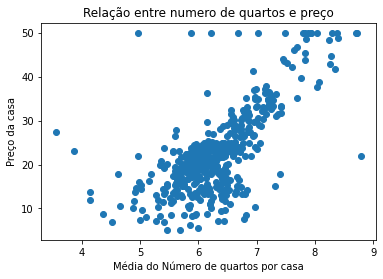

In [15]:
plt.scatter(data.RM,y)
plt.xlabel('Média do Número de quartos por casa')
plt.ylabel('Preço da casa')
plt.title('Relação entre numero de quartos e preço')
plt.show()

In [17]:
#criando o objeto de regrassão linear
modelo = LinearRegression()

In [18]:
#tipo do objeto
type(modelo)

sklearn.linear_model.base.LinearRegression

In [19]:
#treinando o modelo
modelo.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
#coeficientes
print('Coeficiente: ',modelo.intercept_)
print('Numero de Coeficientes: ',len(modelo.coef_))

Coeficiente:  36.49110328036135
Numero de Coeficientes:  13


In [21]:
# prevendo o preço da casa
modelo.predict(x)

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483,
       18.9958266 , 21.58970854, 20.90534851, 19.55535931, 19.2837957 ,
       19.30000174, 20.52889993, 16.9096749 , 16.17067411, 18.40781636,
       12.52040454, 17.67104565, 15.82934891, 13.80368317, 15.67708138,
       13.3791645 , 15.46258829, 14.69863607, 19.54518512, 20.87309945,
       11.44806825, 18.05900412,  8.78841666, 14.27882319, 13.69097132,
       23.81755469, 22.34216285, 23.11123204, 22.91494157, 31.35826216,
       34.21485385, 28.0207132 , 25.20646572, 24.61192851, 22.94438953,
       22.10150945, 20.42467417, 18.03614022,  9.10176198, 17.20856571,
       21.28259372, 23.97621248, 27.65853521, 24.0521088 , 15.35989132,
       31.14817003, 24.85878746, 33.11017111, 21.77458036, 21.08526739,
       17.87203538, 18.50881381, 23.9879809 , 22.54944098, 23.37068403,
       30.36557584, 25.53407332, 21.11758504, 17.42468223, 20.78

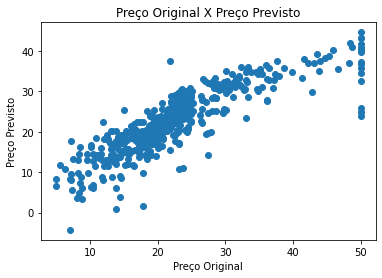

In [25]:
# comparando o preços originais x preço previsto
plt.scatter(data.PRICE,modelo.predict(x))
plt.xlabel('Preço Original')
plt.ylabel('Preço Previsto')
plt.title('Preço Original X Preço Previsto')
plt.show()

## Podemos ver que existem alguns erros na predição do preço das casas

In [26]:
# vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((data.PRICE - modelo.predict(x))**2)
print(mse1)

21.897779217687496


In [27]:
# aplicando regressão linear para apenas uma variavel e calculando o MSE
reg = LinearRegression()
reg.fit(x[['PTRATIO']],data.PRICE)
mse2 = np.mean((data.PRICE - reg.predict(x[['PTRATIO']]))**2)
print(mse2)

62.65220001376927


### O MSE aumentou, indicando que uma única característica não é um bom predictor para o preço das casas.
### Na prática, você não vai implementar regressão linear em todo o dataset. Você vai dividir o dataset em datasets de treino e de teste. Assim, você treina seu modelo nos dados de treino e depois verifica como o modelo se comporta nos seus dados de teste. Vejamos:

In [28]:
# dividinfo X em dados de treino e de teste
x_treino = x[:-50]
x_teste = x[-50:]

#dividindo Y em treino e teste
y_treino = data.PRICE[:-50]
y_teste = data.PRICE[-50:]

#imprimindo o shape dos datasets
print(x_treino.shape,x_teste.shape,y_treino.shape,y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


### Podemos criar nossos datasets de treino de forma manual, mas claro este não é método correto. Vamos então dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split() para isso

In [29]:
from sklearn.model_selection import train_test_split

In [35]:
#dividindo X e Y em dados de treino e de teste
x_treino,x_teste,y_treino,y_teste = train_test_split(x, data.PRICE,test_size = 0.33,random_state=5)

In [36]:
# imprimindo o shape dos datasets
print(x_treino.shape,x_teste.shape,y_treino.shape,y_teste.shape)

(339, 13) (167, 13) (339,) (167,)


In [37]:
# contruindo um modelo de regrassão linear
model = LinearRegression()

In [38]:
#Treinando o modelo
model.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
pred_treino = model.predict(x_treino)
pred_teste = model.predict(x_teste)

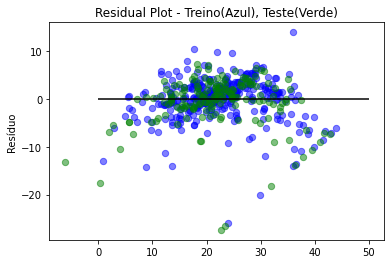

In [40]:
# comparando preços originais x preços previstos
plt.scatter(model.predict(x_treino),model.predict(x_treino) - y_treino, c = 'b',s=40, alpha=0.5)
plt.scatter(model.predict(x_teste),model.predict(x_teste) - y_teste, c = 'g', s=40, alpha=0.5)
plt.hlines(y = 0,xmin=0,xmax=50 )
plt.ylabel('Resíduo')
plt.title('Residual Plot - Treino(Azul), Teste(Verde)')
plt.show()